Main notebook containing relevant diagnostics and important figures for the manuscript. 

It is automatically copied from \_\_main\_\_.ipynb and executed for newly trained ensembles using papermill.

This can also be updated and then triggered again by using the script `execute_ensemble_notebook.py'.

In [1]:
from pathlib import Path
import torch
from torch import nn
from torch.nn import functional as nnf
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from flyvision import results_dir
from flyvision import EnsembleView

import logging

mpl.rcParams["figure.dpi"] = 300

%load_ext autoreload
%autoreload 2

In [2]:
ensemble_name = "flow/9998"  # type: str

In [3]:
validation_subdir = "validation"
loss_file_name = "EPE"

In [4]:
ensemble = EnsembleView(ensemble_name, 
                        loss_file_name=loss_file_name, 
                        validation_subdir=validation_subdir, 
                        checkpoint="best")

Loading ensemble:   0%|          | 0/50 [00:00<?, ?it/s]

[2024-09-09 22:40:43] Failed to load results/flow/9998/040: network
[2024-09-09 22:40:45] Loaded 49 networks.


In [8]:
with ensemble.select_items([0, 4]):
    print(ensemble.names)

['results/flow/9998/000' 'results/flow/9998/004']


In [5]:
nv = ensemble[0]

In [6]:
nv.stored_responses("naturalistic_stimuli_responses").shape

(5580, 80, 65)

In [7]:
ensemble[1].stored_responses("naturalistic_stimuli_responses").shape

(2268, 80, 65)

In [8]:
print(f"Description of experiment: {ensemble[0].dir.config.description}")

Description of experiment: test


# Task performance

## Training and validation losses

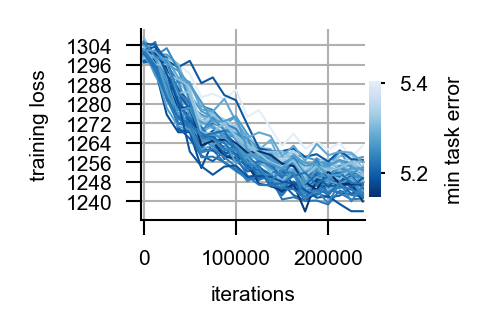

In [7]:
fig, ax = ensemble.training_loss()

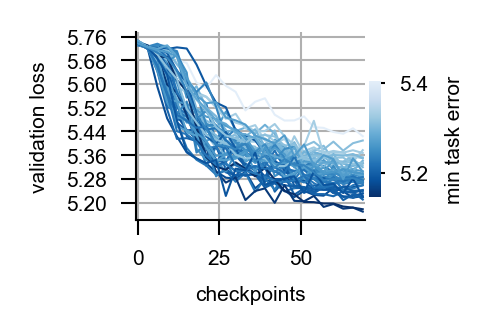

In [8]:
fig, ax = ensemble.validation_loss()

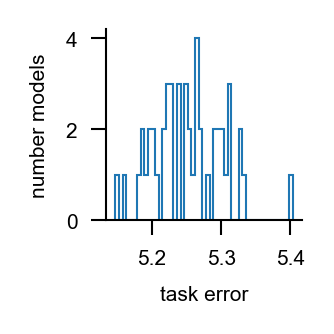

In [9]:
fig, ax = ensemble.task_error_histogram()

## Learned parameter marginals

In [10]:
fig, axes = ensemble.node_parameters("bias")

[2024-09-03 21:04:21] [ensemble.py:169] flow/9998/000 differs from flow/9998/001. Diff is ['≠network_name: flow/9998/000'].


KeyboardInterrupt: 

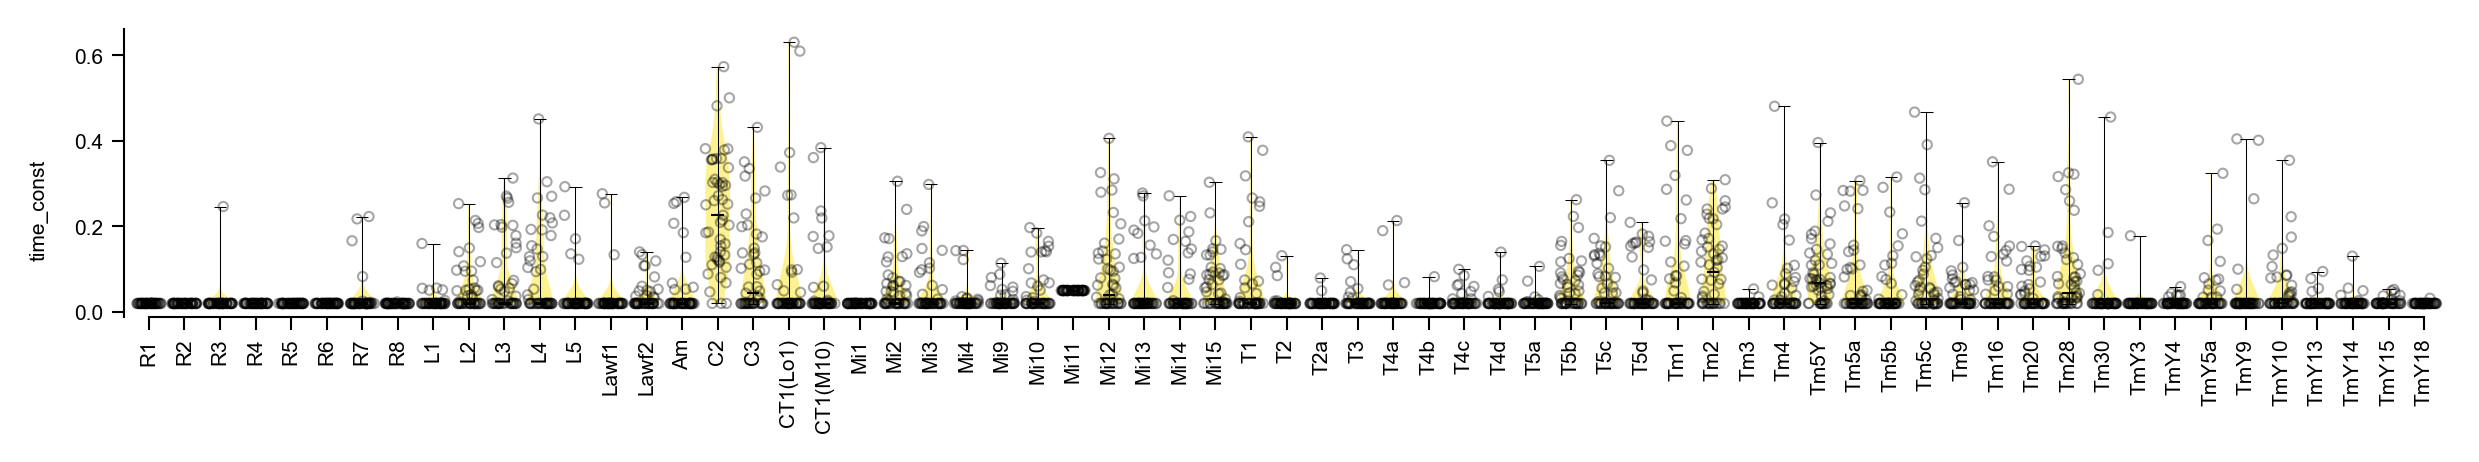

In [ ]:
fig, axes = ensemble.node_parameters("time_const")

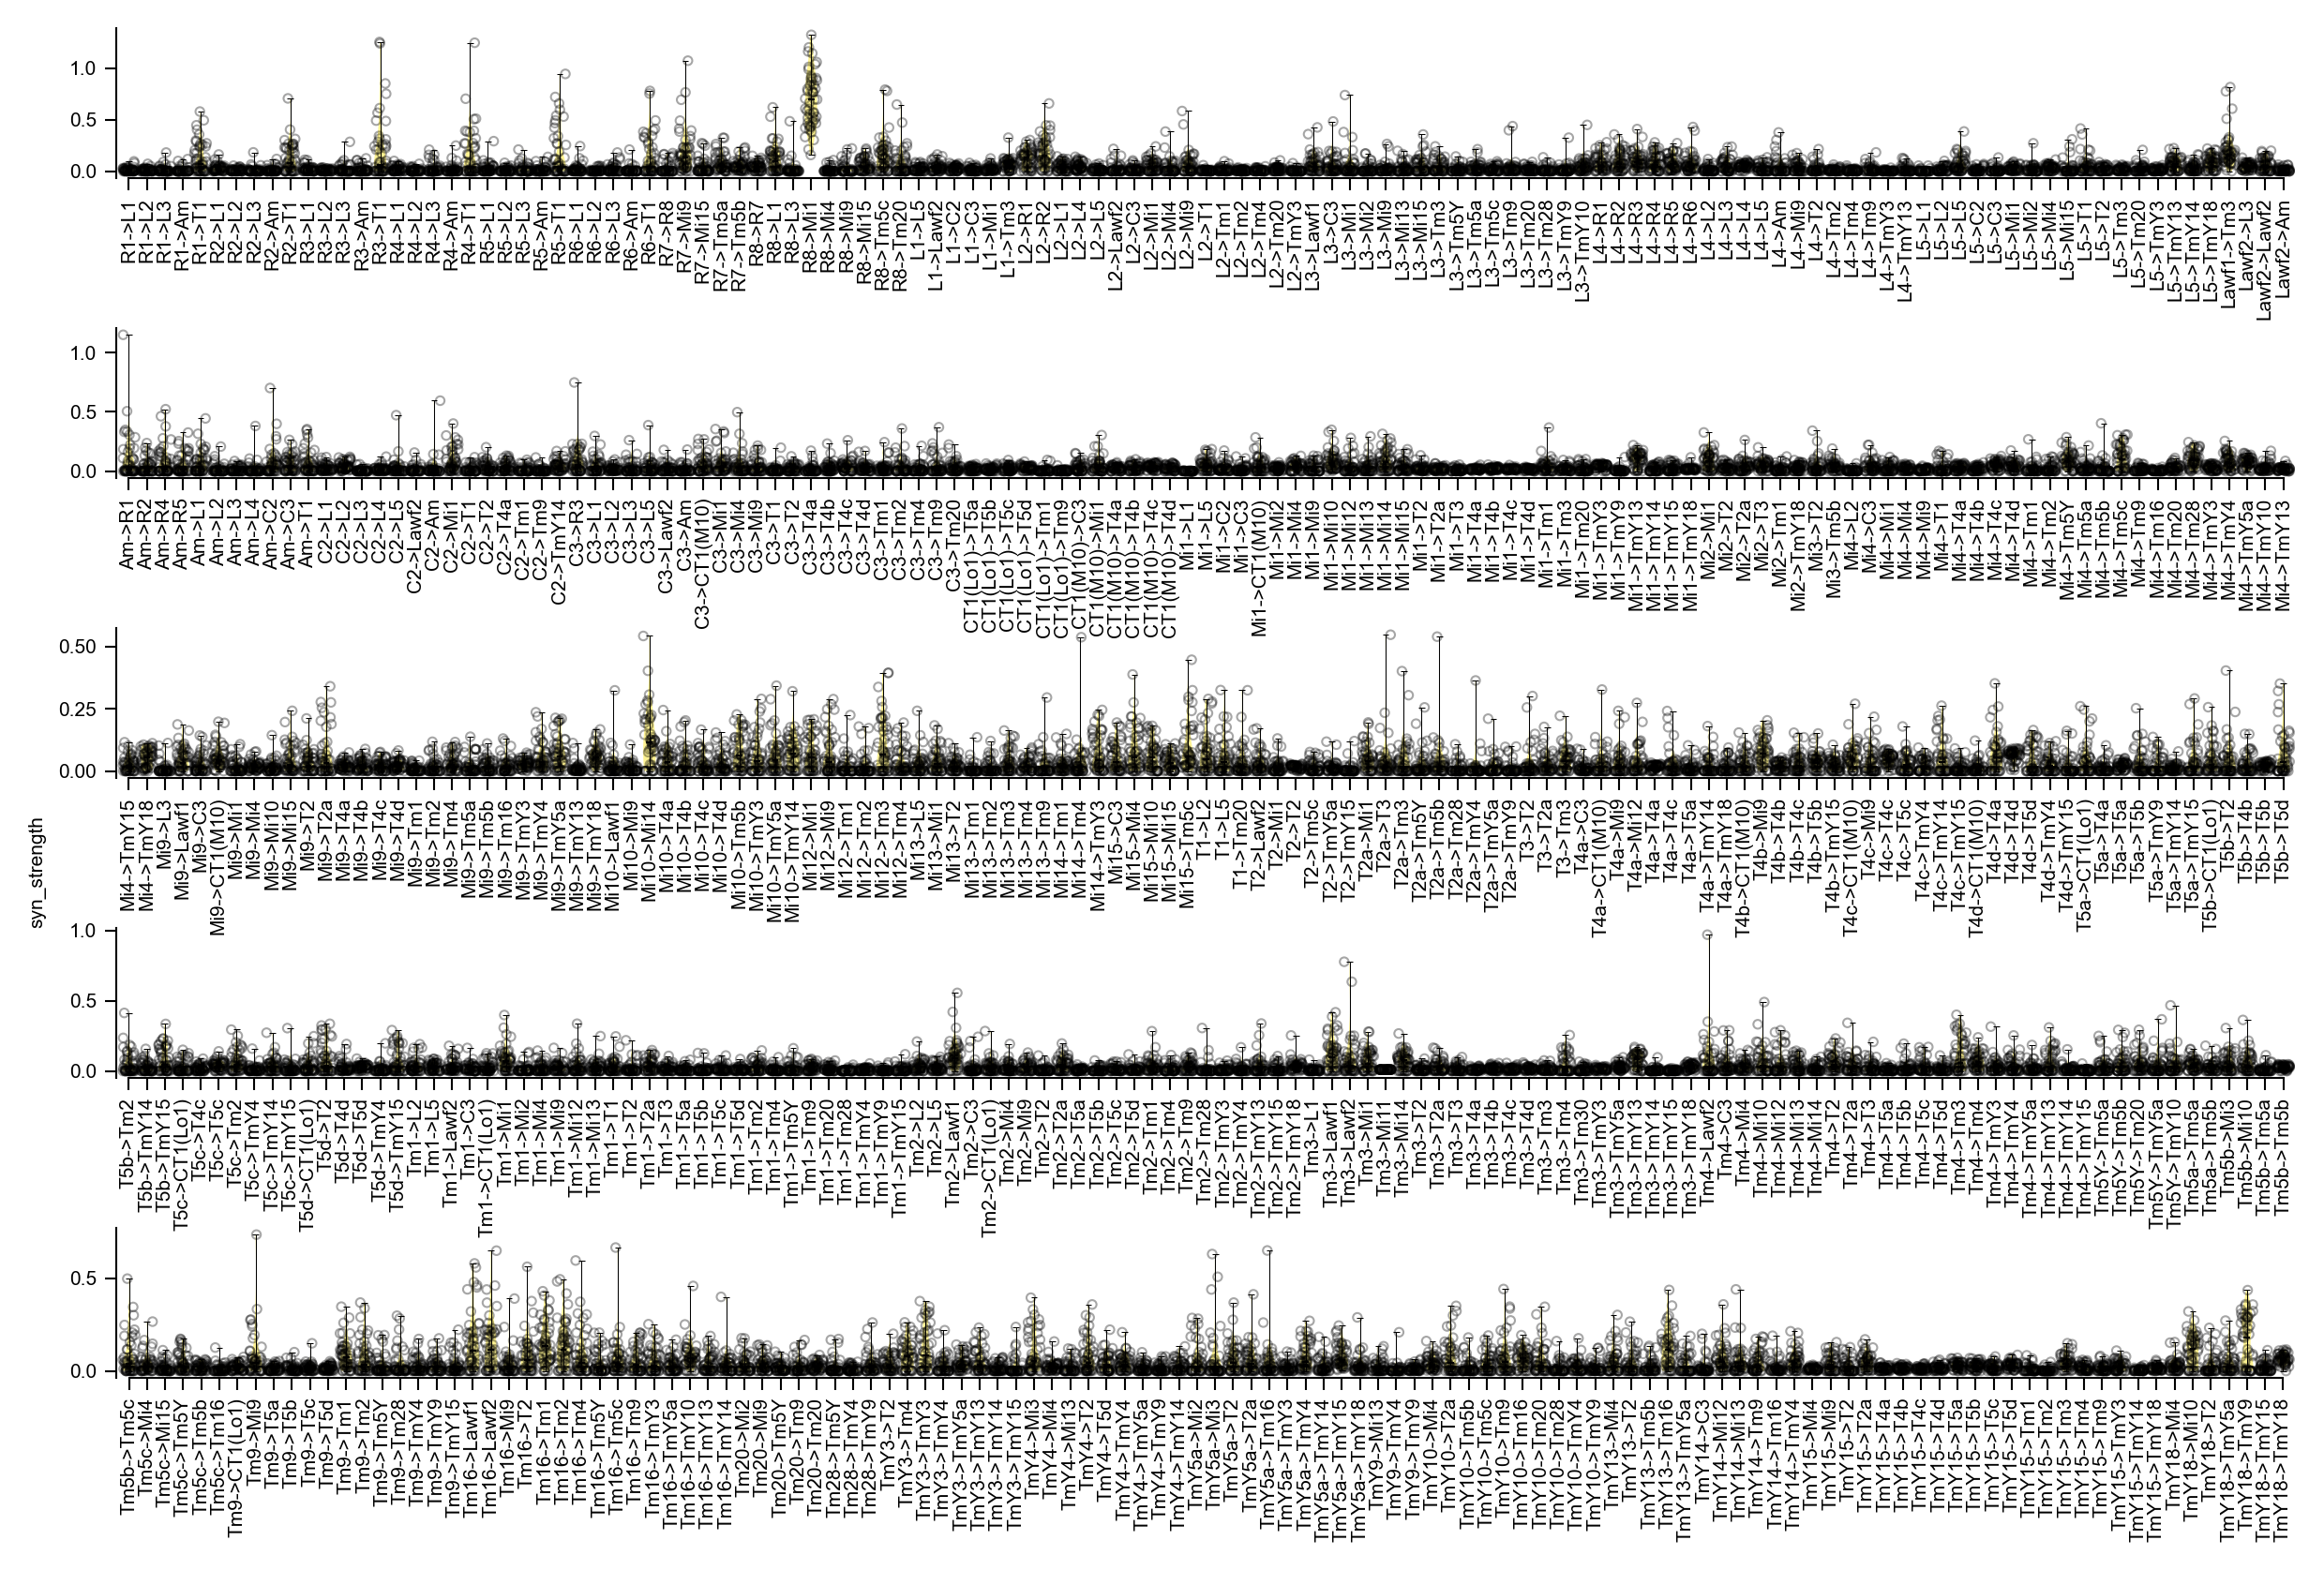

In [ ]:
fig, axes = ensemble.edge_parameters("syn_strength")

## Dead or alive

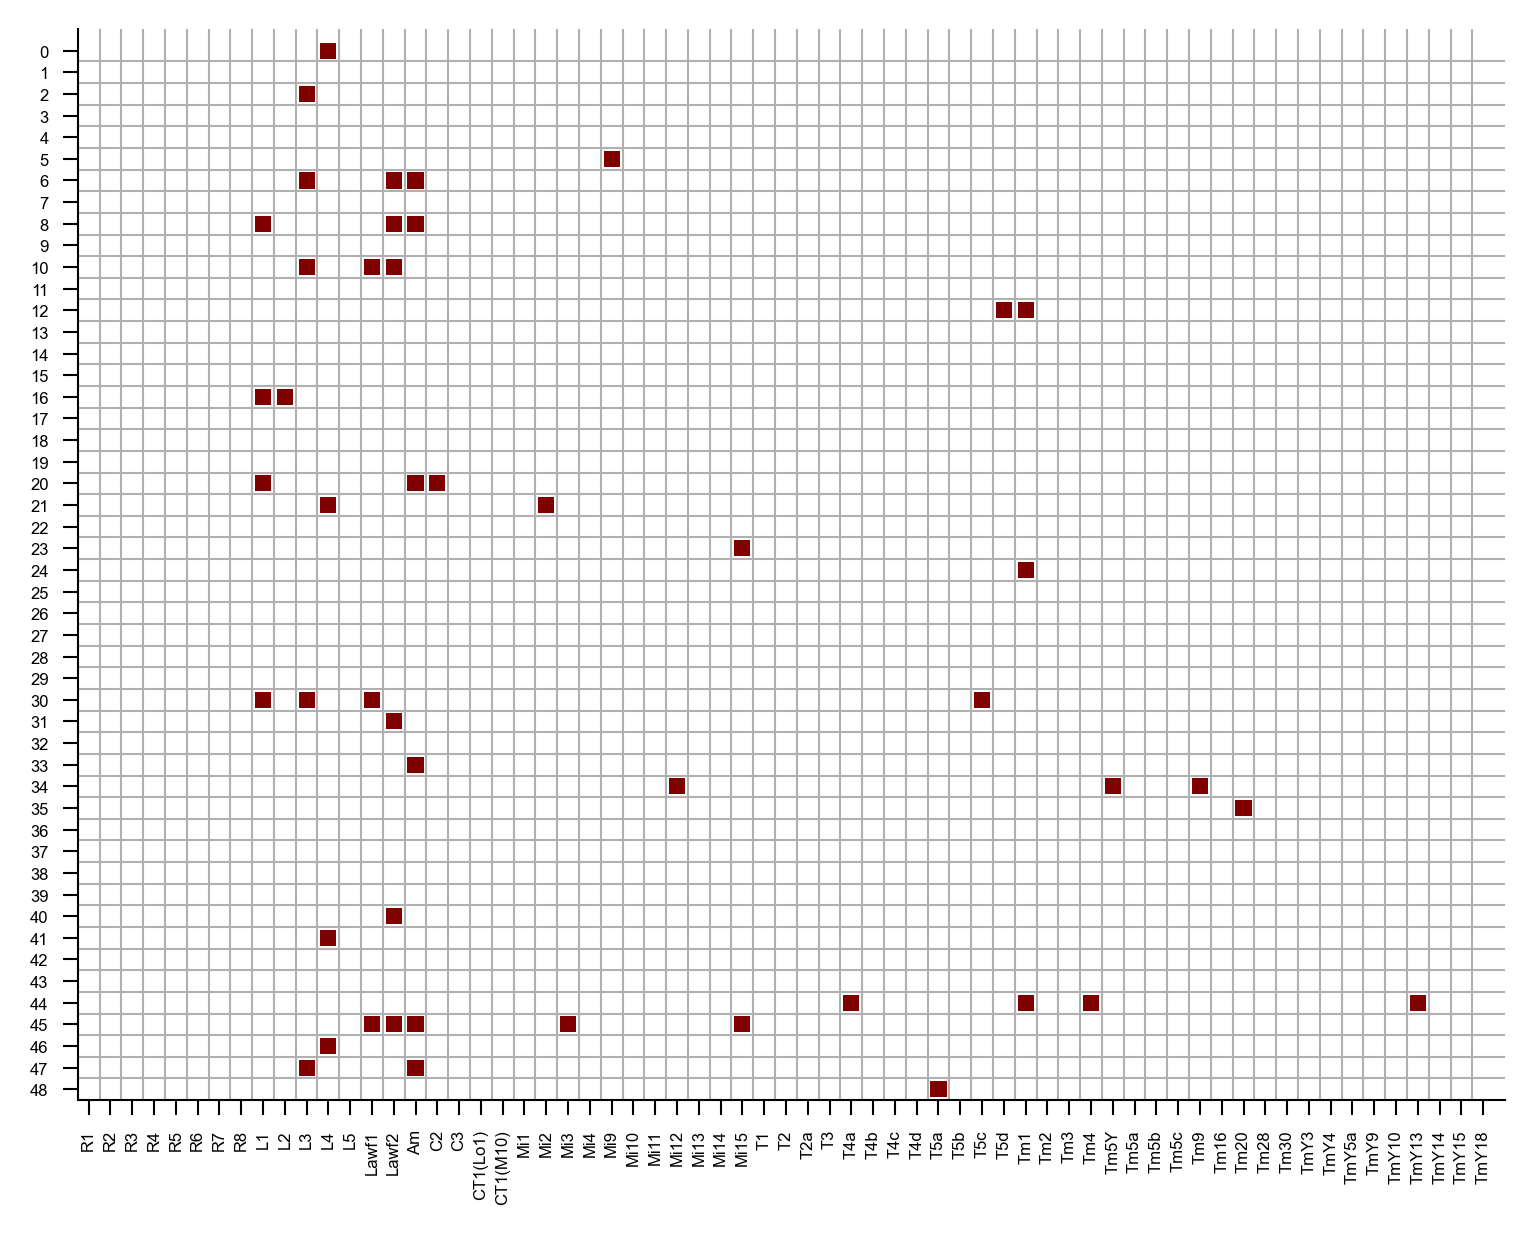

In [ ]:
fig, ax, cbar, matrix = ensemble.dead_or_alive()

## Contrast selectivity and flash response indices (FRI)

#### 20% best task-performing models

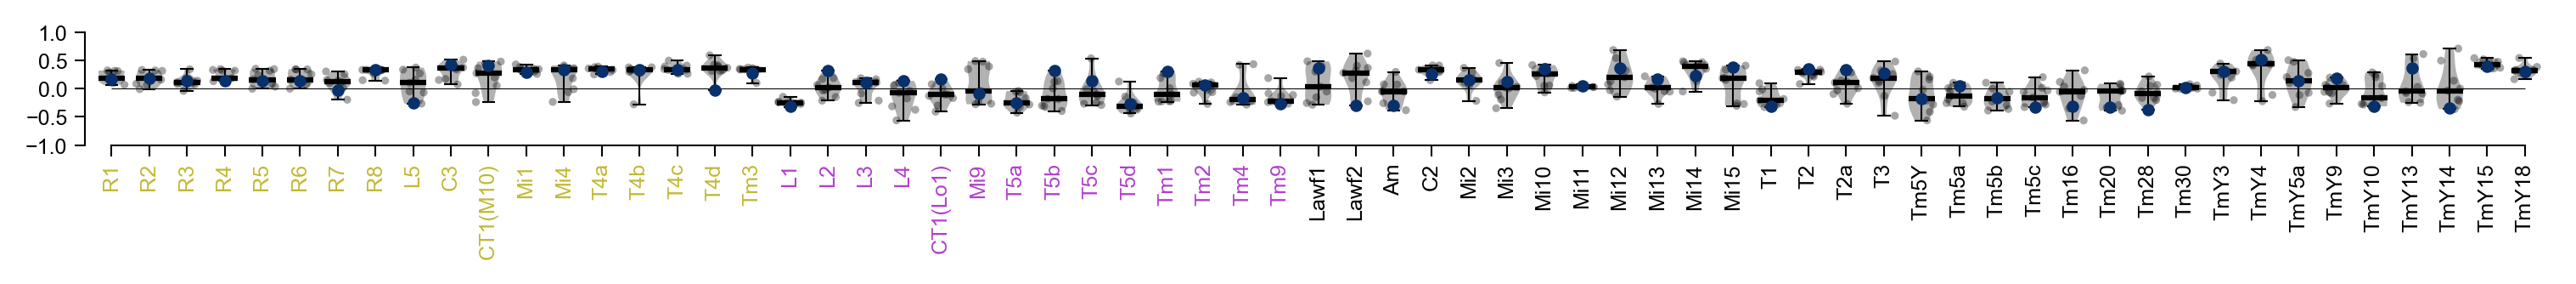

In [5]:
with ensemble.ratio(best=0.2):
    ensemble.flash_response_indices()

#### 100% models

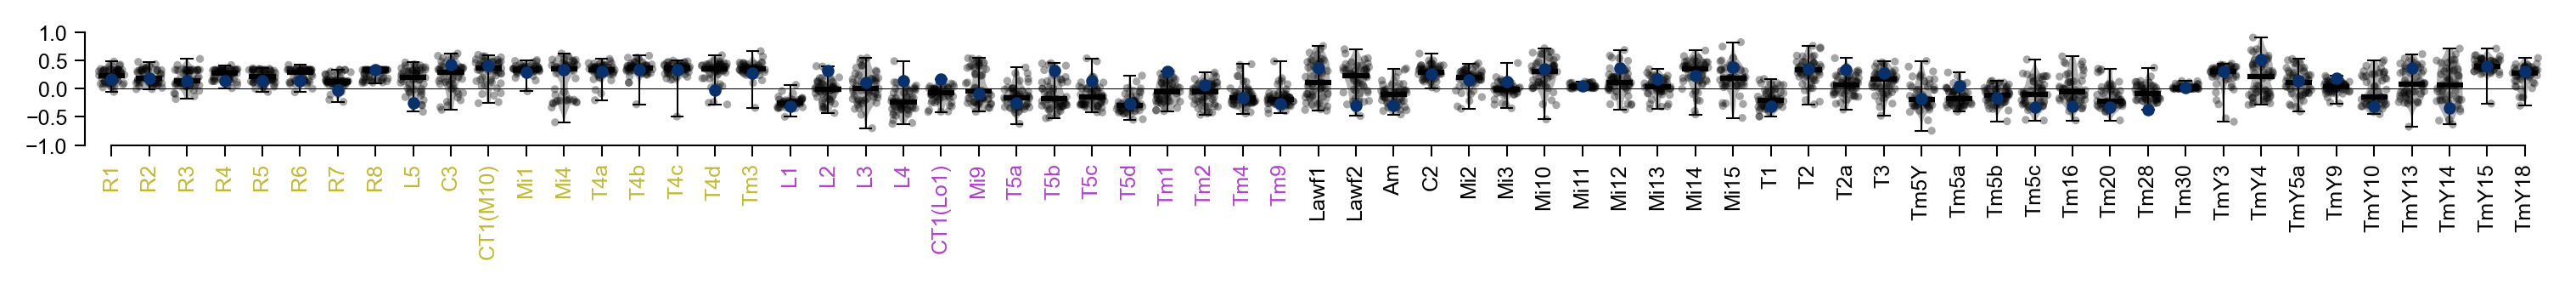

In [18]:
fig, ax = ensemble.flash_response_indices()

## Motion selectivity and direction selectivity index (DSI)

#### 20% best task-performing models

[2024-09-09 22:41:09] Initialized network with NumberOfParams(free=734, fixed=2959) parameters.
[2024-09-09 22:41:09] Recovered network state .
[2024-09-09 22:41:09] Computing 144 stimulus responses.


Batch:   0%|          | 0/144 [00:00<?, ?it/s]

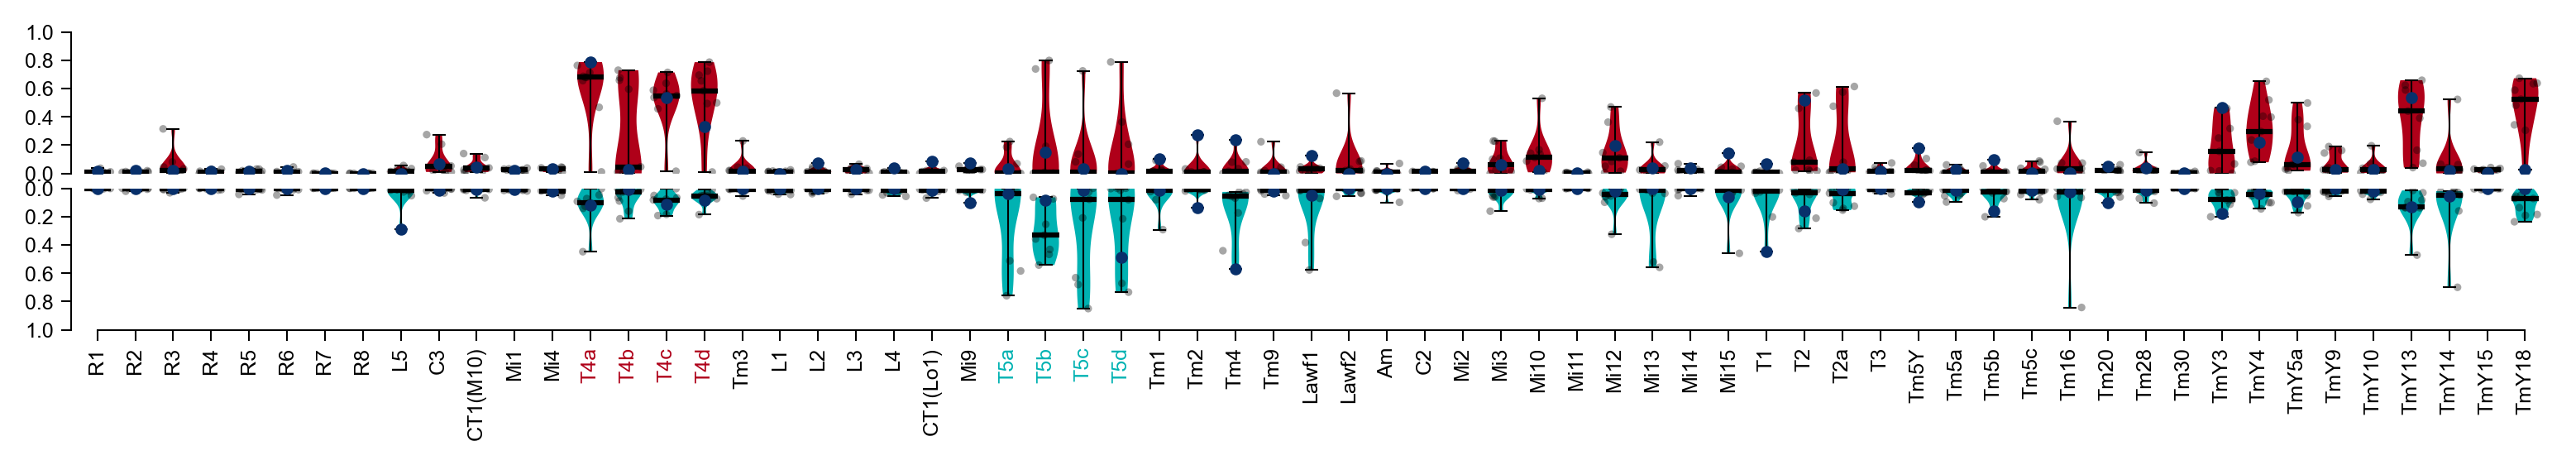

In [6]:
with ensemble.ratio(best=0.2):
    ensemble.direction_selectivity_indices()

#### 100% models

[2024-09-09 22:41:44] Initialized network with NumberOfParams(free=734, fixed=2959) parameters.
[2024-09-09 22:41:44] Recovered network state .
[2024-09-09 22:41:44] Computing 144 stimulus responses.


Batch:   0%|          | 0/144 [00:00<?, ?it/s]

(<Figure size 3000x360 with 2 Axes>, (<Axes: >, <Axes: >))

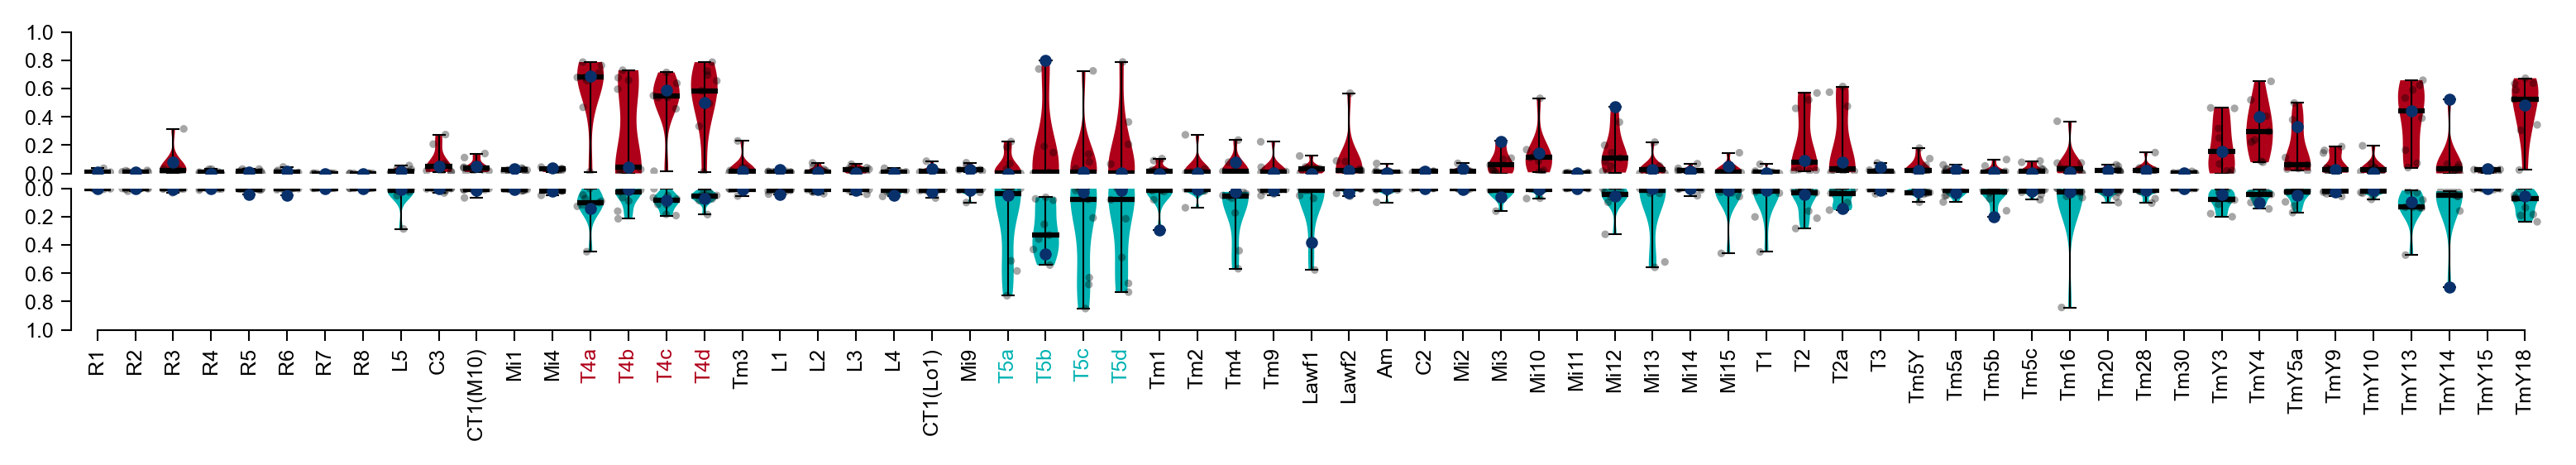

In [7]:
ensemble.direction_selectivity_indices()

## Clustering of models based on responses to naturalistic stimuli

#### T4c

In [9]:
from flyvision.analysis.clustering import umap_and_clustering_main

In [10]:
for embedding in umap_and_clustering_main(ensemble,
                          dt=1 / 100,
    batch_size=4,
    embedding_kwargs={
        "min_dist": 0.105,
        "spread": 9.0,
        "n_neighbors": 5,
        "random_state": 42,
        "n_epochs": 1500,
    },
    gm_kwargs={
        "range_n_clusters": [2, 3, 3, 4, 5],
        "n_init": 100,
        "max_iter": 1000,
        "random_state": 42,
        "tol": 0.001,
    },
    subdir="umap_and_clustering",
    subdir_responses="naturalistic_stimuli_responses",):
    break

ValueError: all input arrays must have the same shape

In [6]:
from flyvision.analysis.clustering import umap_and_clustering_main

In [13]:
umap_and_clustering_main(ensemble)

ValueError: all input arrays must have the same shape

In [17]:
ensemble[0].dir["naturalistic_stimuli_responses"][ensemble[0].checkpoints.current_chkpt_key]

chkpt_best_validation_EPE/
    (empty)

In [12]:
ensemble[0].dir["naturalistic_stimuli_responses"]

naturalistic_stimuli_responses/ - Last modified: September 08, 2024 07:35:24
└── chkpt_best_validation_EPE/
    ├── _meta.yaml
    ├── network_states/
    │   ...
    ├── optstims/
    │   ...
    └── regularized_optstims/
        ...

displaying: 5 directories, 1 files, 2 levels.

In [13]:
responses = np.stack(
            [
                network.dir["naturalistic_stimuli_responses"]["chkpt_best_validation_EPE"].network_states.nodes.activity_central[:]
                for network in ensemble.values()
            ]
        )

In [14]:
responses.shape

(49, 2268, 80, 65)

In [9]:
clustering.__dict__.keys()

dict_keys(['embedding', 'range_n_clusters', 'n_init', 'max_iter', 'random_state', 'labels', 'gm', 'scores', 'n_clusters', 'kwargs'])

In [10]:
clustering.embedding.__dict__.keys()

dict_keys(['_embedding', 'minmaxscaler', 'mask', 'reducer'])

In [27]:
embeddingplot = ensemble.embedding_cluster_plot(
    "T4c",
    plot_mode="paper",
    cbar=True,
    validation_subwrap=validation_subwrap,
    naturalistic_responses_wrap=naturalistic_responses_wrap,
)

AttributeError: 'EnsembleView' object has no attribute 'embedding_cluster_plot'

In [ ]:
fig, axes = ensemble.paper_cluster_motion_tuning(
    "T4c",
    intensity=1,
    validation_subwrap=validation_subwrap,
    naturalistic_responses_wrap=naturalistic_responses_wrap,
    subwrap=movingedge_subwrap    
)

#### T5c

In [ ]:
embeddingplot = ensemble.embedding_cluster_plot(
    "T5c",
    plot_mode="paper",
    cbar=True,
    validation_subwrap=validation_subwrap,
    naturalistic_responses_wrap=naturalistic_responses_wrap,
)

In [ ]:
fig, axes = ensemble.paper_cluster_motion_tuning(
    "T5c",
    intensity=0,
    validation_subwrap=validation_subwrap,
    naturalistic_responses_wrap=naturalistic_responses_wrap,
    subwrap=movingedge_subwrap    
)

## Figure 3

In [ ]:
number_of_models = 4

### A motion tuning best model T4, T5

In [ ]:
with ensemble.sort("min", validation_subwrap=validation_subwrap):
    nnv = ensemble[0]
    nnv.paper_direction_tuning("T4", subwrap=movingedge_subwrap)
    nnv.paper_direction_tuning("T5", subwrap=movingedge_subwrap)
    nnv.paper_direction_tuning("TmY", subwrap=movingedge_subwrap)

In [ ]:
with ensemble.sort("min", validation_subwrap=validation_subwrap):
    with ensemble.model_items(list(range(number_of_models))):
        ensemble.paper_direction_tuning("T4", subwrap=movingedge_subwrap)

In [ ]:
with ensemble.sort("min", validation_subwrap=validation_subwrap):
    with ensemble.model_items(list(range(number_of_models))):
        ensemble.paper_direction_tuning("T5", subwrap=movingedge_subwrap)

In [ ]:
with ensemble.sort("min", validation_subwrap=validation_subwrap):
    with ensemble.model_items(list(range(number_of_models))):
        ensemble.paper_direction_tuning("TmY", subwrap=movingedge_subwrap)

### B T4c / T5c voltage trace

In [ ]:
with ensemble.sort("min", validation_subwrap=validation_subwrap):
    for i in range(number_of_models):
        nnv = ensemble[i]
        fig, axes = nnv.paper_t4c_traces(subwrap=movingedge_subwrap)
        axes.set_title("T4c", fontsize=5, y=0.95)
        fig.suptitle(f"{i+1}. best model -- {nnv.name}", fontsize=5, y=1.1)
        fig, axes = nnv.paper_t5c_traces(subwrap=movingedge_subwrap)
        axes.set_title("T5c", fontsize=5, y=0.95)

### C T4c / T5c spatio-temporal receptive field

In [ ]:
with ensemble.sort("min", validation_subwrap=validation_subwrap):
    for i in range(number_of_models):
        nnv = ensemble[i]
        fig, axes = nnv.plot_strf("T4c", 1, subwrap=impulse_responses_subwrap)
        axes[0][0].set_title("T4c", fontsize=5, y=0.95)
        fig.suptitle(f"{i+1}. best model -- {nnv.name}", fontsize=5, y=1.1)
        fig, axes = nnv.plot_strf("T5c", 1, subwrap=impulse_responses_subwrap)
        axes[0][0].set_title("T5c", fontsize=5, y=0.95)

### D T4c / T5c maximally excitatory stimulus

In [ ]:
with ensemble.sort("min", validation_subwrap=validation_subwrap):
    for i in range(number_of_models):
        nnv = ensemble[i]
        fig, axes = nnv.plot_rnmei(
            "T4c", plot_resp=False, max_extent=4, figsize=[5, 1], subwrap=rnmeis_subwrap
        )
        axes[0][0].set_title("T4c", fontsize=5, y=0.95)
        fig.suptitle(f"{i+1}. best model -- {nnv.name}", fontsize=5, y=1.1)
        fig, axes = nnv.plot_rnmei(
            "T5c", plot_resp=False, max_extent=4, figsize=[5, 1], subwrap=rnmeis_subwrap
        )
        axes[0][0].set_title("T5c", fontsize=5, y=0.95)
        plt.show()

### E motion detector input neurons spatial receptive fields

In [ ]:
with ensemble.sort("min", validation_subwrap=validation_subwrap):
    for i in range(number_of_models):
        nnv = ensemble[i]
        fig, axes = nnv.spatial_rfs_EMD_inputs(
            intensity=1, subwrap=impulse_responses_subwrap
        )
        fig.suptitle(f"{i+1}. best model -- {nnv.name}", fontsize=5, y=0.85)

### F motion detector input neurons temporal receptive fields

In [ ]:
with ensemble.sort("min", validation_subwrap=validation_subwrap):
    for i in range(number_of_models):
        nnv = ensemble[i]
        fig, axes = nnv.temporal_rfs_EMD_inputs(
            intensity=1, subwrap=impulse_responses_subwrap
        )
        fig.suptitle(f"{i+1}. best model -- {nnv.name}", fontsize=5, y=0.55)

## Figure 4

### A / D clustering of naturalistic stimuli responses

#### TmY3

In [ ]:
embeddingplot = ensemble.embedding_cluster_plot(
    "TmY3",
    plot_mode="paper",
    cbar=True,
    validation_subwrap=validation_subwrap,
    naturalistic_responses_wrap=naturalistic_responses_wrap,
)

In [ ]:
fig, axes = ensemble.paper_cluster_motion_tuning(
    "TmY3",
    intensity=1,
    validation_subwrap=validation_subwrap,
    naturalistic_responses_wrap=naturalistic_responses_wrap,
    subwrap=movingedge_subwrap    
)

#### TmY17

In [ ]:
embeddingplot = ensemble.embedding_cluster_plot(
    "TmY17",
    plot_mode="paper",
    cbar=True,
    validation_subwrap=validation_subwrap,
    naturalistic_responses_wrap=naturalistic_responses_wrap,
)

In [ ]:
fig, axes = ensemble.paper_cluster_motion_tuning(
    "TmY17",
    intensity=1,
    validation_subwrap=validation_subwrap,
    naturalistic_responses_wrap=naturalistic_responses_wrap,
    subwrap=movingedge_subwrap    
)

## SI

### cell profile

In [ ]:
# plt.ioff()
# si_cell_profile(ensemble,
#                 rfs=True,
#                 prfs=True,
#                 umap=True,
#                 motion_tuning_edges=True,
#                 motion_tuning_bars=True,
#                 flash_response_traces=True,
#                 edge_response_traces=True,
#                 bar_response_traces=True,
#                 impulse_responses=True,
#                 meis=True,
#                 tex_to_pdf=True)

## Extended data figures

In [ ]:
from dvs.analysis.extended_data_figures import (
    task_error,
    task_error_tuning_correlation,
    tuning_correlations_dsi,
    tuning_correlations_fri,
    preferred_direction_prediction_distances
)

In [ ]:
fig, ax = task_error(ensemble, validation_subwrap, validation_loss_fn)

In [ ]:
fig, ax = task_error_tuning_correlation(ensemble,
                                       validation_subwrap,
                                        validation_loss_fn,
                                        movingedge_subwrap,
                                        flash_subwrap,)

In [ ]:
fig, ax = tuning_correlations_dsi(ensemble, movingedge_subwrap)

In [ ]:
fig, ax = preferred_direction_prediction_distances(ensemble, movingedge_subwrap)

In [ ]:
fig, ax = tuning_correlations_fri(ensemble, flash_subwrap)